# Bike Sharing 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The business has shared their 2 year data from Jan 1,2018 to Dec 31st 2019 for us to analyse. The data contains weather details, temperature, humidity, and other details like if the date was a holiday or working day. Based on these factors, we are required to build a Linear Regression to predict their customer numbers

<h3>Importing the appropriate libraries</h3>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

This part contains certain hardcoded variables, dictionaries that are used throughout the code and custom functions.

In [87]:
#Warning's will not be displayed in the output.
filterwarnings("ignore")

#Set the seed.
seed = 42
np.random.seed(seed)

# Set the test size.
test_set_size = 0.2

## Some dictionaries that are used in the analysis:
binary_dict = {0:"No",1:"Yes"}
seasons_dict = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}

year_dict = {0:"2018",1:"2019"}

month_dict = month = {1:'Jan',
		2:'Feb',
		3:'Mar',
		4:'Apr',
		5:'May',
		6:'Jun',
		7:'July',
		8:'Aug',
		9:'Sep',
		10:'Oct',
		11:'Nov',
		12:'Dec'}

day_dict = {6:"Mon", 0:"Tues", 1:"Wed", 2:"Thurs", 3:"Fri", 4:"Sat", 5:"Sun"}

weather_dict = {1:"Clear",2:"Mist",3:"Light_Snow", 4:"Heavy_Snow"}

<h4>Custom Functions</h4>

In [88]:
#Function to build a model using statsmodels
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#Function to calculate VIFs and print them.
def print_vif_table(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

Import the dataset

In [89]:
master  = pd.read_csv("day.csv")
master = master.drop(["instant"],axis=1)
master.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Missing Value Treatment:

In [90]:
print(master.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB
None


**Conclusion** : <br>
There are no missing values to be dealth with.

### Data Processing

<h4>Data Dictionary:</h4>

The following data dictionary was provided by the company: <br>

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

For EDA purposes we need to create and change a few columns:
- Few columns have been changed to *Category* datatype.
- The values from the data dictionary has been replaced with easily readable labels.

In [91]:
# Make a copy of the dataframe for EDA purposes.
data = pd.DataFrame.copy(master)

#dtday: Covert to datetime object.
data["dteday"] = pd.to_datetime(data["dteday"])

#Convert to category dtype:
category_vars = ["weekday","mnth","season","weathersit","holiday","workingday"]
for var in category_vars:
    data[var] = data[var].astype("category")

# Seasons: 
data["season"]  = data["season"].replace(seasons_dict)

#year
data["yr"] = data["yr"].replace({0:"2018",1:"2019"})

#Month:
data["mnth"] = data["mnth"].replace(month_dict)

#weekday
data["weekday"] = data["weekday"].replace(day_dict)

#WorkingDay
data['workingday'] = data["workingday"].replace({0:"No",1:"Yes"})

#Weather Situation
data['weathersit'] = data["weathersit"].replace(weather_dict)

#drop the dteday column as it is unnecessary:
data.drop("dteday",axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,0,Mon,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,0,Tues,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,0,Wed,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,0,Thurs,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,0,Fri,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Outliers Analysis:

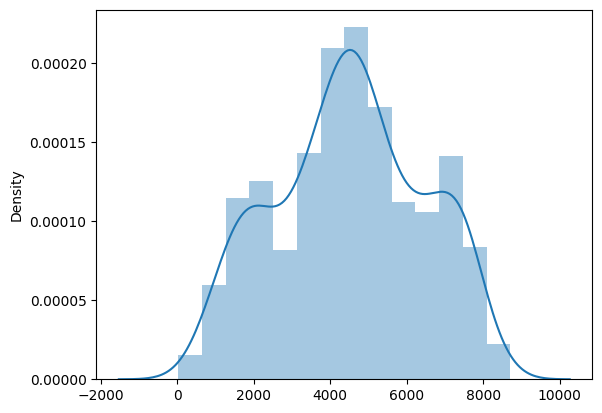

In [92]:
sns.distplot(x=data["cnt"]);

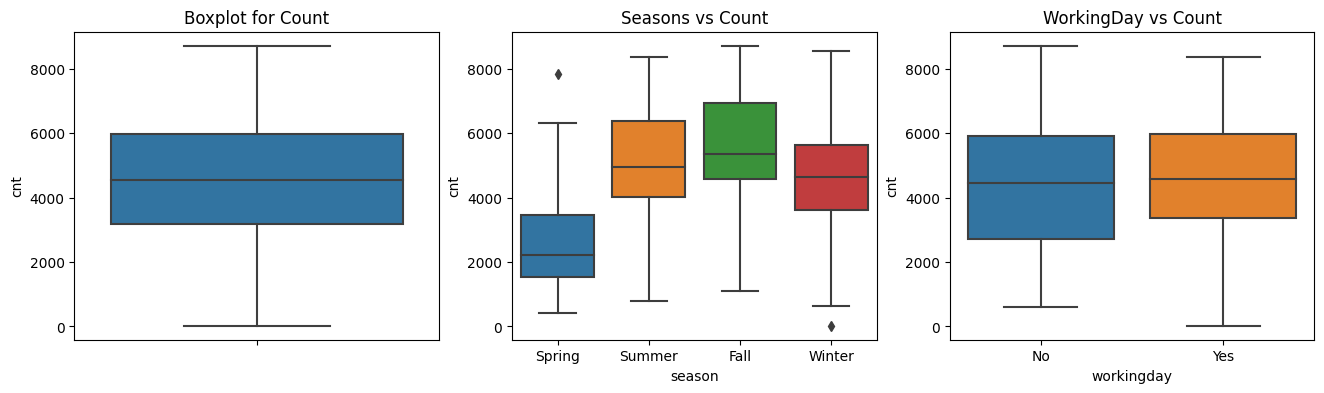

In [93]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.boxplot(data=data,y="cnt",ax=ax[0])
ax[0].set_title("Boxplot for Count")

sns.boxplot(data=data,y="cnt",x="season",ax=ax[1])
ax[1].set_title("Seasons vs Count")

sns.boxplot(data=data,y="cnt",x="workingday",ax=ax[2])
ax[2].set_title("WorkingDay vs Count")

plt.show()

*Conclusion* :<br>
- Spring season has lower usage count for bikes.
- The medians for Working Day or Non-Working is similar.

### Correlation Analysis:

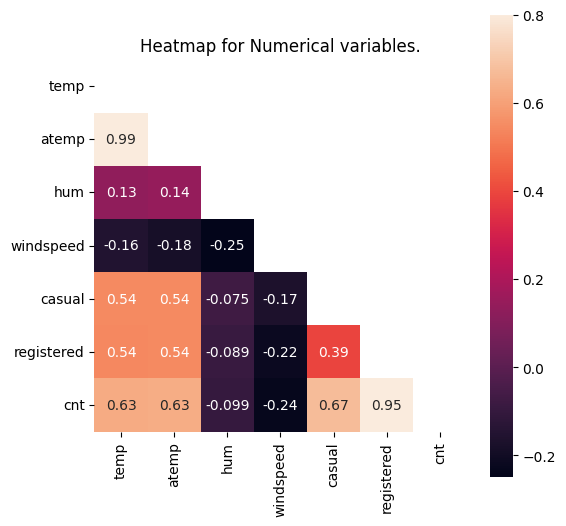

In [123]:
corr = data[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6,6))
plt.title("Heatmap for Numerical variables.")
sns.heatmap(corr, annot=True,mask=mask,square=True,vmax=0.8);

**Conclusion** : <br>
- *casual* and  *registered* are highly correlated to *cnt* (the target variable), thus they can be dropped.
- *temp* and *atemp* are also highly correlated, thus either one can be dropped for modelling.

<h3> Anaylsis of Count <h4>

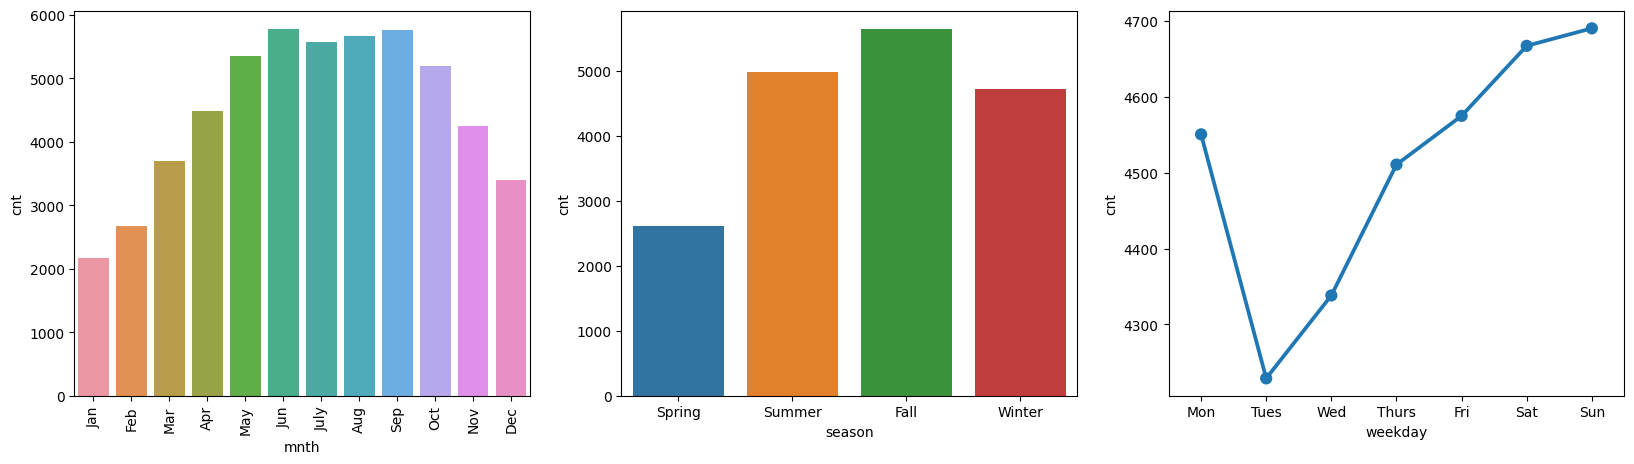

In [95]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

monthAggregated = pd.DataFrame(data.groupby("mnth")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 90)
sns.barplot(data=monthSorted,x="mnth",y="cnt",ax=ax[0]);


seasonAggregated = pd.DataFrame(data.groupby("season")["cnt"].mean()).reset_index()
seasonSorted = seasonAggregated.sort_values(by="cnt",ascending=False)
sns.barplot(data=seasonSorted,x="season",y="cnt",ax=ax[1]);

weekdayAggregated = pd.DataFrame(data.groupby("weekday")["cnt"].mean()).reset_index()
weekdaySorted = weekdayAggregated.sort_values(by="cnt",ascending=False)
sns.pointplot(data=weekdaySorted,x="weekday",y="cnt",ax=ax[2],order=list(day_dict.values()));

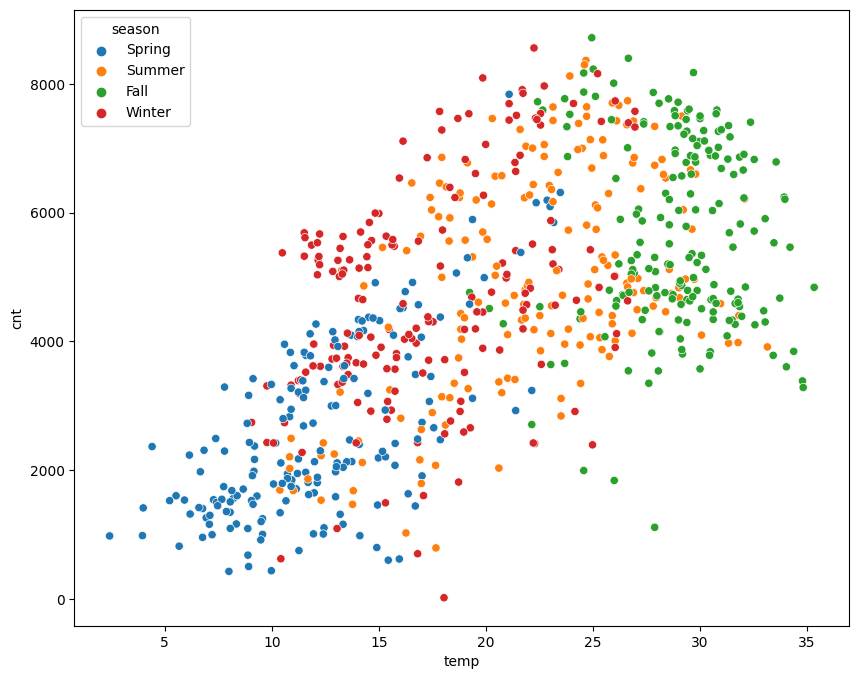

In [96]:
# Temperature vs Count
plt.figure(figsize=(10,8))
sns.scatterplot(x=data["temp"],y=data["cnt"],hue=data["season"]);

**Conclusion** : <br>
- The months of May to September sees the highest demand of bikes. 
- This corresponds to pleasure temperature range of 20&deg;C to 30&deg;C
- Saturday and Sunday sees the highest demand per week. This kind of goes against logic that weekdays would see more demand due to work/school hours.
- It is surprisingly odd that Tuesday sees the lowest number of demand, irrespective of the similar count of values in the dataset. 

Analysis of Categorical variables:

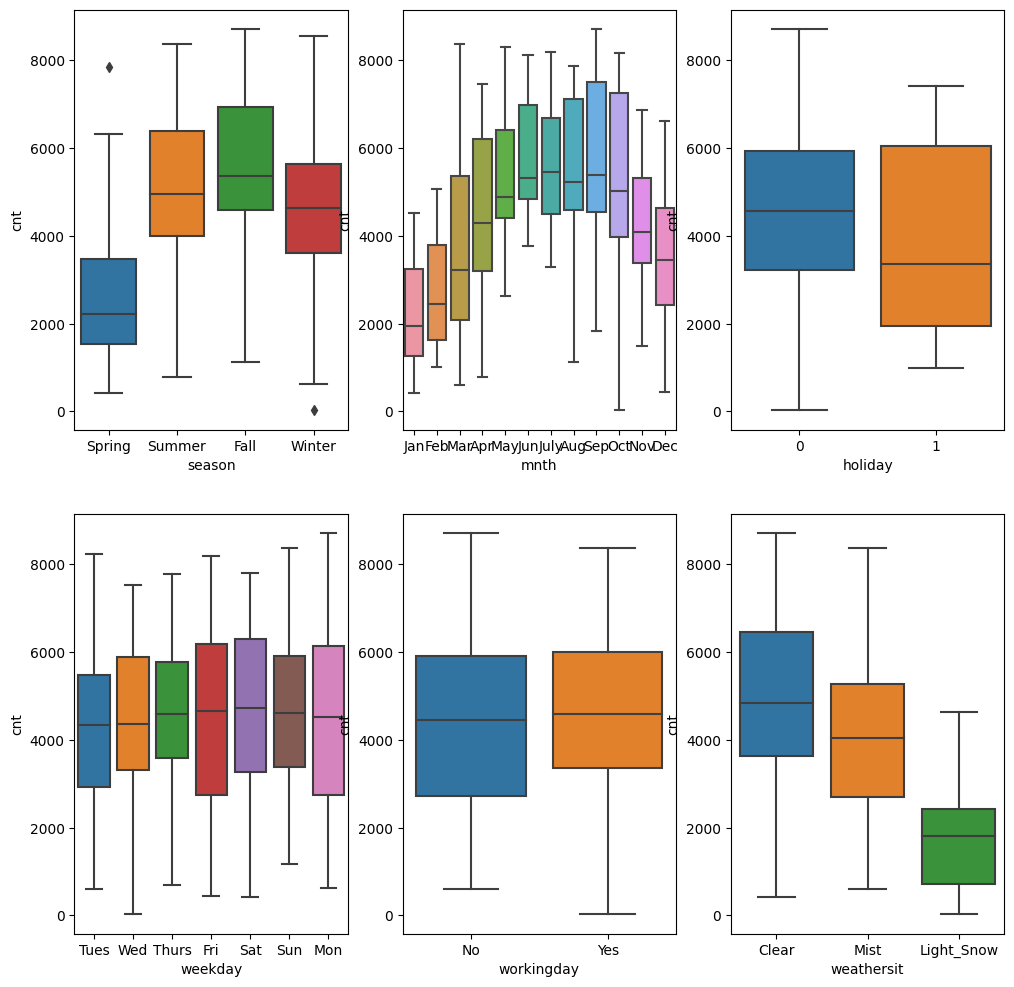

In [97]:
# Boxplots to check Target variable (Count) against other categorical predictors:
categorical_vars = ['season','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(12, 12))
for i in enumerate(categorical_vars):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
plt.show()

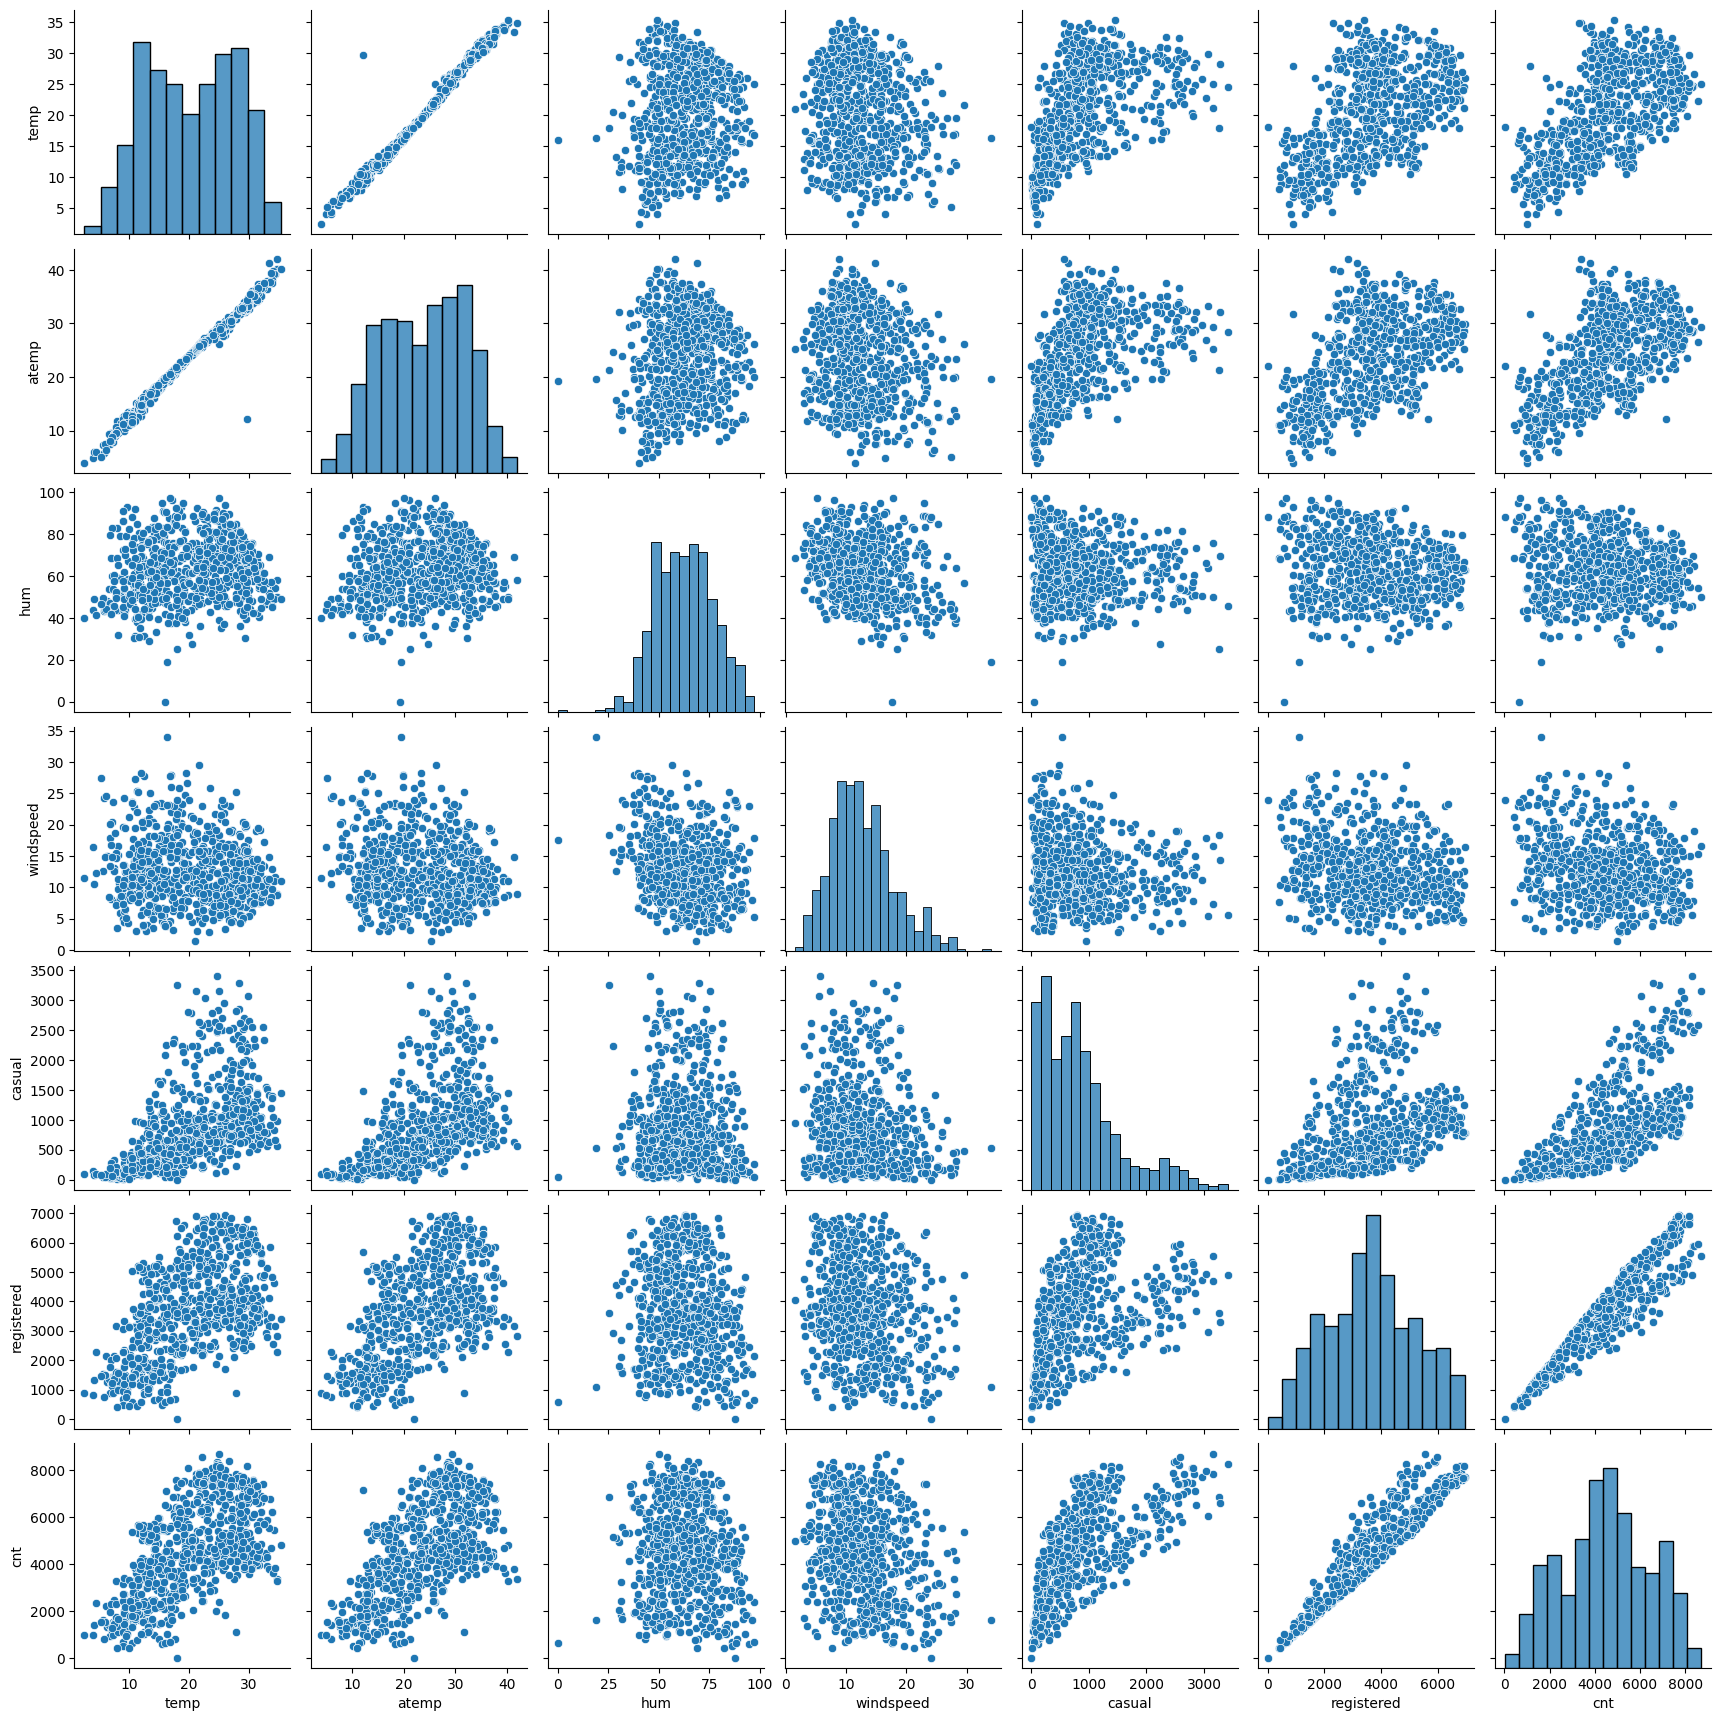

In [98]:
sns.pairplot(data);

---

## Data Modelling

#### Data Preparation:

We will begin the modelling processby dropping the unnecessary columns from the main dataset:

| Column | Reason |
| ----------- | ----------- |
| dteday | Unnecessary as we have built the new features from it |
| Temp | Highly correlated to 'atemp' (temperature that user feels). <br>Keeping 'atemp' is logical as user will decide if they want to get a bike or not<br>based on what temperature they feel |
|Casual and Registered| These columns are highly correlated to the *cnt* as it is total sum of these two columns.|

In [99]:
master = master.drop(["dteday","temp","casual","registered"],axis=1)
master.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [100]:
#Convert to category dtype:
category_vars = ["weekday","mnth","season","weathersit","holiday","workingday"]
for var in category_vars:
    master[var] = master[var].astype("category")

# Seasons: 
master["season"]  = master["season"].replace(seasons_dict)

# Year:
master["yr"]  = master["yr"].replace(year_dict)

#Month:
master["mnth"] = master["mnth"].replace(month_dict)

#weekday
master["weekday"] = master["weekday"].replace(day_dict)

#Weather Situation
master['weathersit'] = master["weathersit"].replace(weather_dict)

#WorkingDay and holiday
master['workingday'] = master["workingday"].replace(binary_dict)
master['holiday'] = master["holiday"].replace(binary_dict)

master.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,No,Mist,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tues,No,Mist,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Clear,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thurs,Yes,Clear,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Clear,11.46350,43.6957,12.522300,1600


Convert to dummy variables using One-Hot Encoding:

In [101]:
cat_vars = ["season","yr","mnth","holiday","weekday","workingday"]

df = pd.get_dummies(master,columns=cat_vars,drop_first=True)
df = pd.get_dummies(df,columns=["weathersit"])
print(df.columns)
df.head()

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_Summer', 'season_Fall',
       'season_Winter', 'yr_2019', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr',
       'mnth_May', 'mnth_Jun', 'mnth_July', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct',
       'mnth_Nov', 'mnth_Dec', 'holiday_Yes', 'weekday_Wed', 'weekday_Thurs',
       'weekday_Fri', 'weekday_Sat', 'weekday_Sun', 'weekday_Mon',
       'workingday_Yes', 'weathersit_Clear', 'weathersit_Mist',
       'weathersit_Light_Snow'],
      dtype='object')


,atemp,hum,windspeed,cnt,season_Summer,season_Fall,season_Winter,yr_2019,mnth_Feb,mnth_Mar,...,weekday_Wed,weekday_Thurs,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,workingday_Yes,weathersit_Clear,weathersit_Mist,weathersit_Light_Snow
0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


#### Splitting Data into training and test set:

In [102]:
y = df.pop("cnt")
X = df

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=seed)

In [104]:
print(X_train.shape)
print(X_test.shape)

(584, 29)
(146, 29)


#### Scaling the continuous variables: <br>
Scaling is done so that all the *numerical* features (which are likely to have different magnitude and units) have the same scale so as to get the correct model.

In [105]:
num_vars = ["atemp","hum","windspeed"]
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

Checking the correlation of all the features that have been generated: <br>

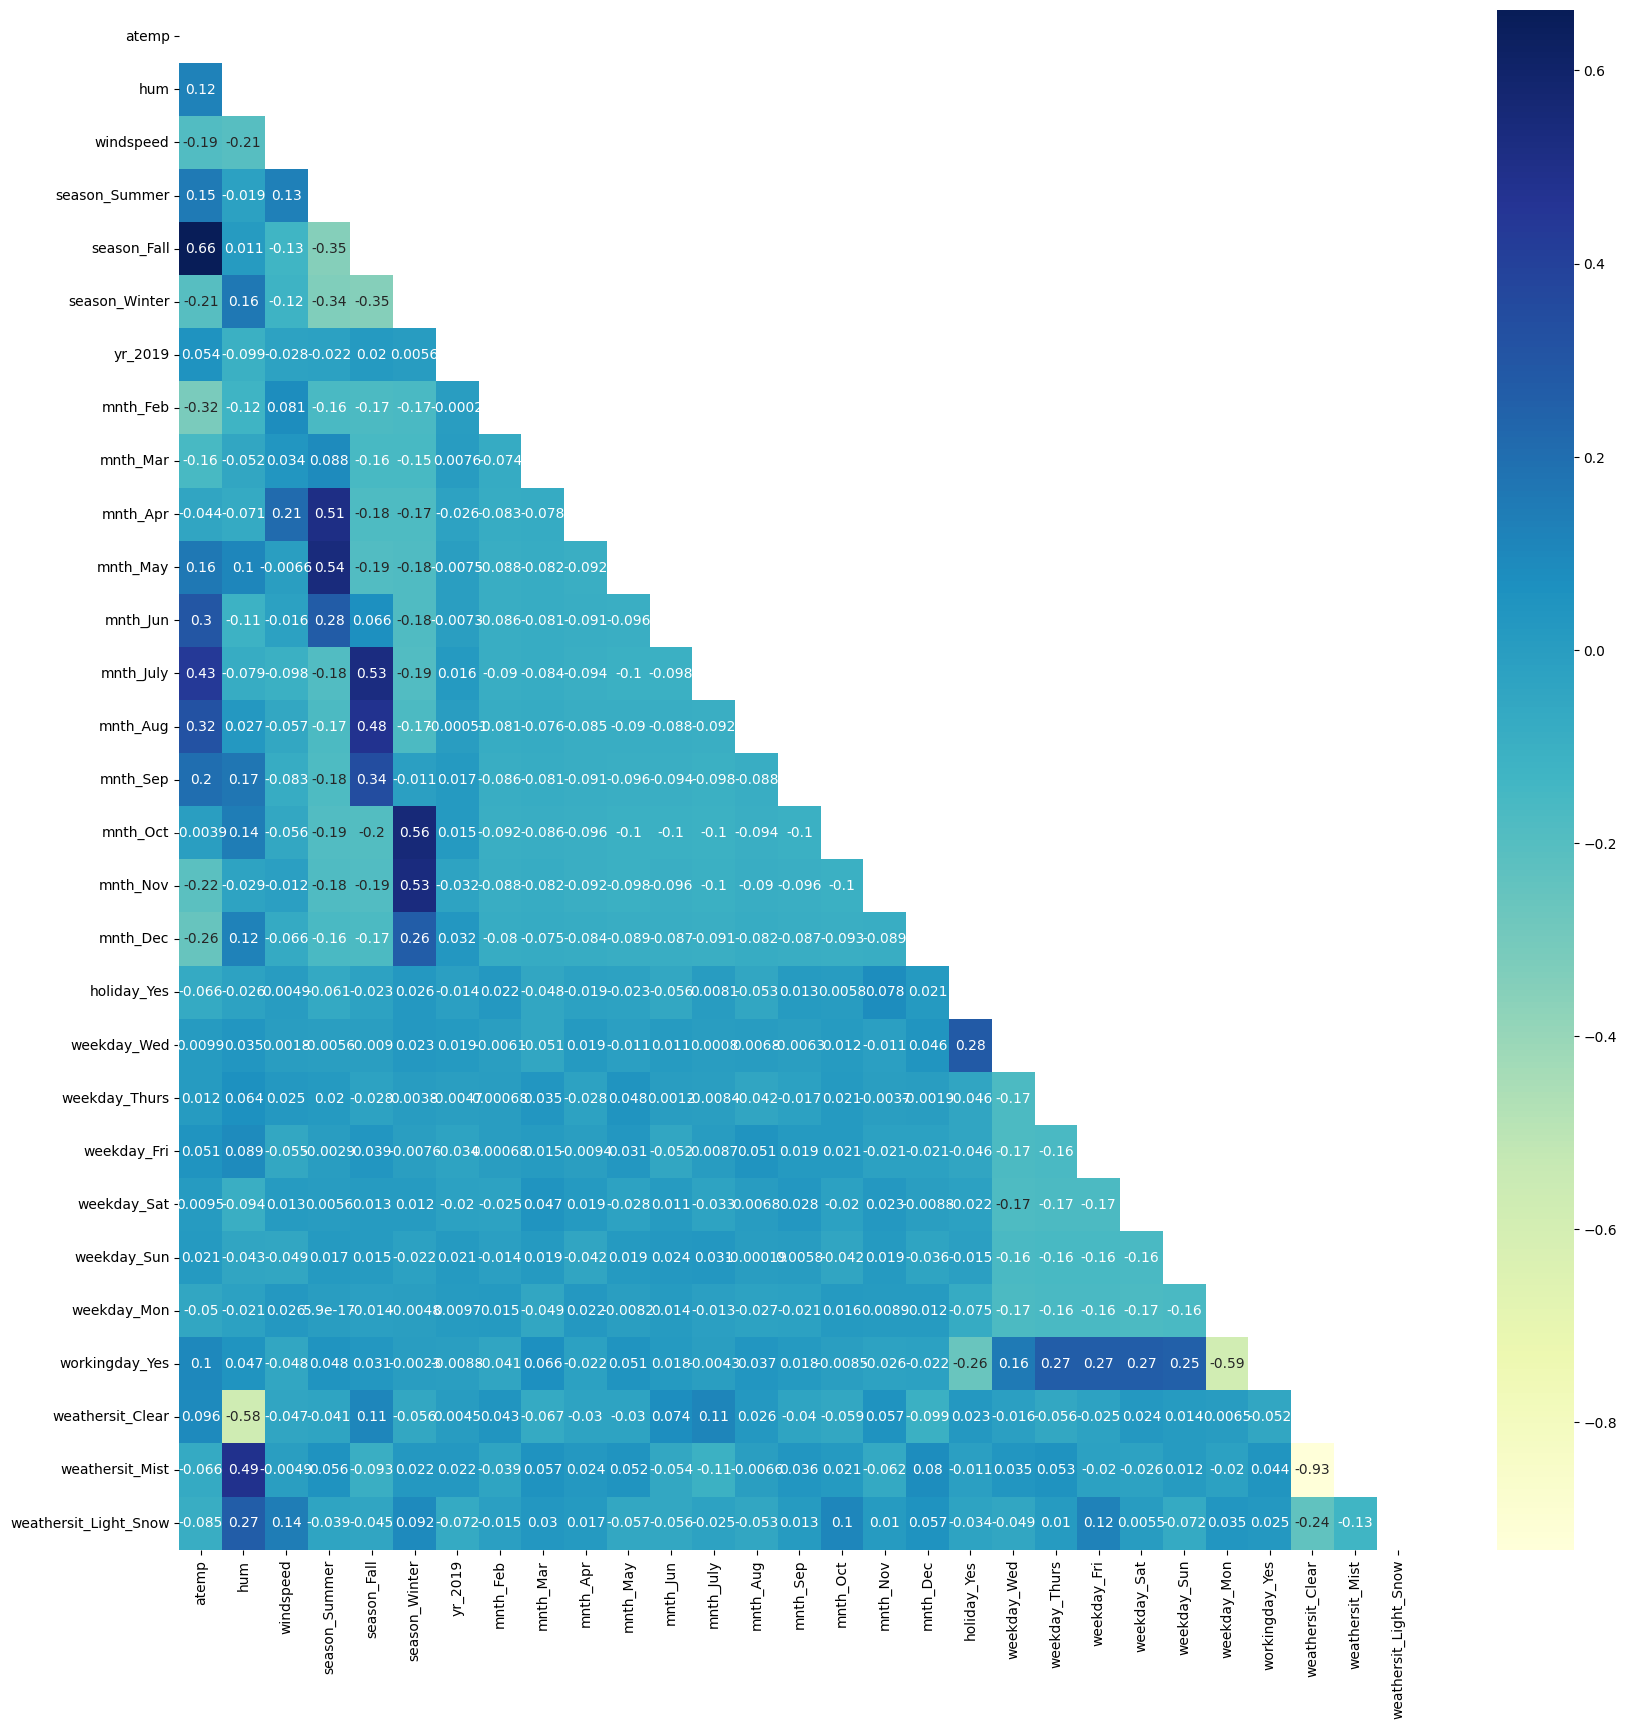

In [106]:
plt.figure(figsize=(20,20))

corr = X_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, cmap="YlGnBu",mask=mask)
plt.show()

#### Feature Selection

For selecting the appropriate features for the model, we will be using Recursive Feature Elimination(*RFE*) method.

In [107]:
# First Model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Right now we have 30 features. Using RFE, let's cut down to top 20.

In [108]:
rfe = RFE(estimator=lr,n_features_to_select=20)
rfe.fit(X=X_train,y=y_train)
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Summer', True, 1),
 ('season_Fall', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_July', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Dec', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Wed', False, 2),
 ('weekday_Thurs', False, 10),
 ('weekday_Fri', False, 7),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 8),
 ('weekday_Mon', True, 1),
 ('workingday_Yes', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_Light_Snow', True, 1)]

Now we have the features along with their importance to the target variable.

#### Manual Elimination of Features using statsmodel

In [109]:
# Features selected by RFE:
X_train.columns[rfe.support_]

Index(['atemp', 'hum', 'windspeed', 'season_Summer', 'season_Fall',
       'season_Winter', 'yr_2019', 'mnth_Mar', 'mnth_May', 'mnth_July',
       'mnth_Sep', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'holiday_Yes',
       'weekday_Mon', 'workingday_Yes', 'weathersit_Clear', 'weathersit_Mist',
       'weathersit_Light_Snow'],
      dtype='object')

In [110]:
# Features not selected by RFE:
X_train.columns[~rfe.support_]

Index(['mnth_Feb', 'mnth_Apr', 'mnth_Jun', 'mnth_Aug', 'weekday_Wed',
       'weekday_Thurs', 'weekday_Fri', 'weekday_Sat', 'weekday_Sun'],
      dtype='object')

# Building Model:
Building the model based on the features selected by the RFE.

Model 1: <br>
All the features selected by RFE.

In [111]:
cols  = ['atemp', 'hum', 'windspeed', 'season_Summer', 'season_Fall',
       'season_Winter', 'yr_2019', 'mnth_Mar', 'mnth_May', 'mnth_July',
       'mnth_Sep', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'holiday_Yes',
       'weekday_Mon', 'workingday_Yes', 'weathersit_Clear', 'weathersit_Mist',
       'weathersit_Light_Snow']

build_model(cols)
print_vif_table(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     158.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.80e-211
Time:                        18:57:30   Log-Likelihood:                -4715.2
No. Observations:                 584   AIC:                             9470.
Df Residuals:                     564   BIC:                             9558.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   688.01

*mnth_dec* has a high p-value of 0.9. We'll eliminate *mnth_oct* based on the p-value.

Model-2: <br>
Dropping mnth_oct

In [112]:
cols.remove('mnth_Oct')
build_model(cols)
print_vif_table(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     166.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.16e-212
Time:                        18:57:30   Log-Likelihood:                -4715.6
No. Observations:                 584   AIC:                             9469.
Df Residuals:                     565   BIC:                             9552.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   686.52

*holiday_Yes* has a p-value of 0.18, which is more than the threshold. Thus dropping the column.

Model-3: <br>
Dropping *holiday_Yes* 

In [113]:
cols.remove('holiday_Yes')
build_model(cols)
print_vif_table(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          3.92e-213
Time:                        18:57:31   Log-Likelihood:                -4716.6
No. Observations:                 584   AIC:                             9469.
Df Residuals:                     566   BIC:                             9548.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   643.48

*mnth_May* has a p-value of 0.052, a value just above the threshold. However, the VIF is below 5 and it has a positive coeffecient.<br>
Yet, let's try and build a model without it.

Model-4: <br>
Dropping *mnth_May*

In [114]:
cols.remove('mnth_May')
build_model(cols)
print_vif_table(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.85e-213
Time:                        18:57:31   Log-Likelihood:                -4718.5
No. Observations:                 584   AIC:                             9471.
Df Residuals:                     567   BIC:                             9545.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   591.89

This model has no more features with a high p-value. However, as per the VIF table, two features have a very high VIF value. <br> We'll start off with dropping the topmost variable - *weathersit_Clear*.

Model-5: <br>
Dropping *weathersit_Clear*

In [115]:
cols.remove('weathersit_Clear')
build_model(cols)
print_vif_table(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.85e-213
Time:                        18:57:31   Log-Likelihood:                -4718.5
No. Observations:                 584   AIC:                             9471.
Df Residuals:                     567   BIC:                             9545.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1617.92

At this point of time, we can see there are no high p-values. But the VIF table has two features with very high VIF - *atemp* and *hum*. <br>
From the previous logic, we should ideally be removing these due to high VIF values, but common sense suggests that the temperature user is feeling (*atemp*) and the humidity(*hum*) of the area is very likely to dictate whether the user will take a bike or not. Thus it makes no sense to remove these variables. <br>

**Note**: Also further modelling reduced the $R^{2}$ value reduced from 0.84 to 0.77 - a massive drop.

Thus it makes sense to keep these two variables and select Model-5 as our final model.

----

# Final Model
Model-5 from the previous iterations will be our final model. The features to be used are:
- atemp
- hum  
- season_Fall  
- windspeed
- workingday_Yes 
- season_Winter
- season_Summer
- weathersit_Mist
- yr_2019
- mnth_Nov
- mnth_July
- weekday_Mon
- mnth_Sep
- mnth_Dec
- weathersit_Light Snow
- mnth_Mar

In [116]:
cols = ["atemp","hum","season_Fall","windspeed","workingday_Yes","season_Winter","season_Summer","weathersit_Mist","yr_2019","mnth_Nov","mnth_July","weekday_Mon","mnth_Sep","mnth_Dec","weathersit_Light_Snow","mnth_Mar"]

lr_final = LinearRegression()
lr_final.fit(X_train[cols],y_train)

print(f"Intercept: {lr.intercept_}, \n Coef: {lr.coef_}")

Intercept: 818.3085420559519, 
 Coef: [ 3881.53051417 -1457.78104635 -1058.76741967  1092.39977553
  1005.39393118  1757.08756772  1971.44869219   108.02873297
   531.2683197    176.16281467   474.83313283   249.23668499
  -148.36136433   161.46797623   800.9129799    325.11753544
  -394.48612687  -278.10004907  -220.12610041  -114.53830081
   -23.80781901   106.05052659    30.20076482   105.9417844
   458.98548008   323.97305641   835.54144741   402.83793616
 -1238.37938357]


### Residual Analysis: <br>
Distribution of Error terms on training set.

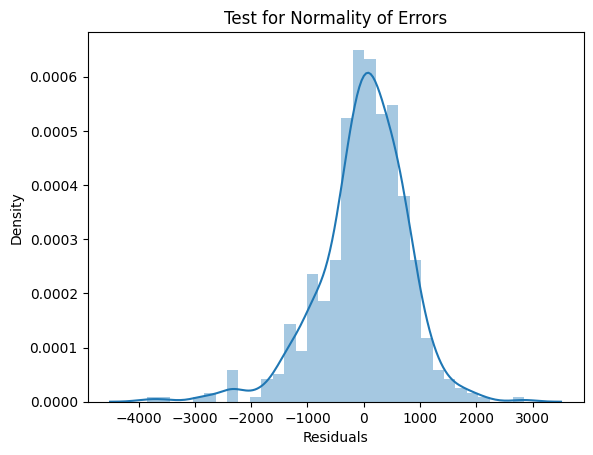

In [117]:
y_train_pred = lr_final.predict(X_train[cols])

# Plot a historgram of the error terms: 
sns.distplot(y_train - y_train_pred)
plt.title("Test for Normality of Errors")
plt.xlabel('Residuals')
plt.show();

The error terms are distributed normally with mean as 0. 

$R^2$ Value for the model:

In [118]:
# Checking the r2_score value via the SKLEARN model.
round(r2_score(y_train, y_train_pred),2)

0.84

$R^{2}$ is same as the Model-5 from statsmodel.

### Heteroscedascity

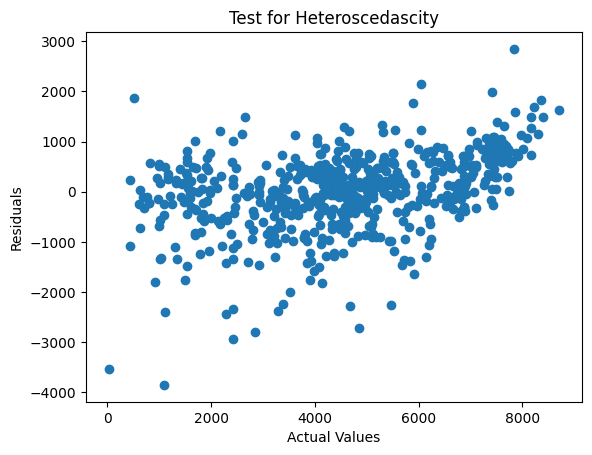

In [119]:
residuals  = (y_train - y_train_pred)
plt.scatter(y_train, residuals)
plt.title("Test for Heteroscedascity")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show();

There are no particular patterns being formed between the residuals and training data points.

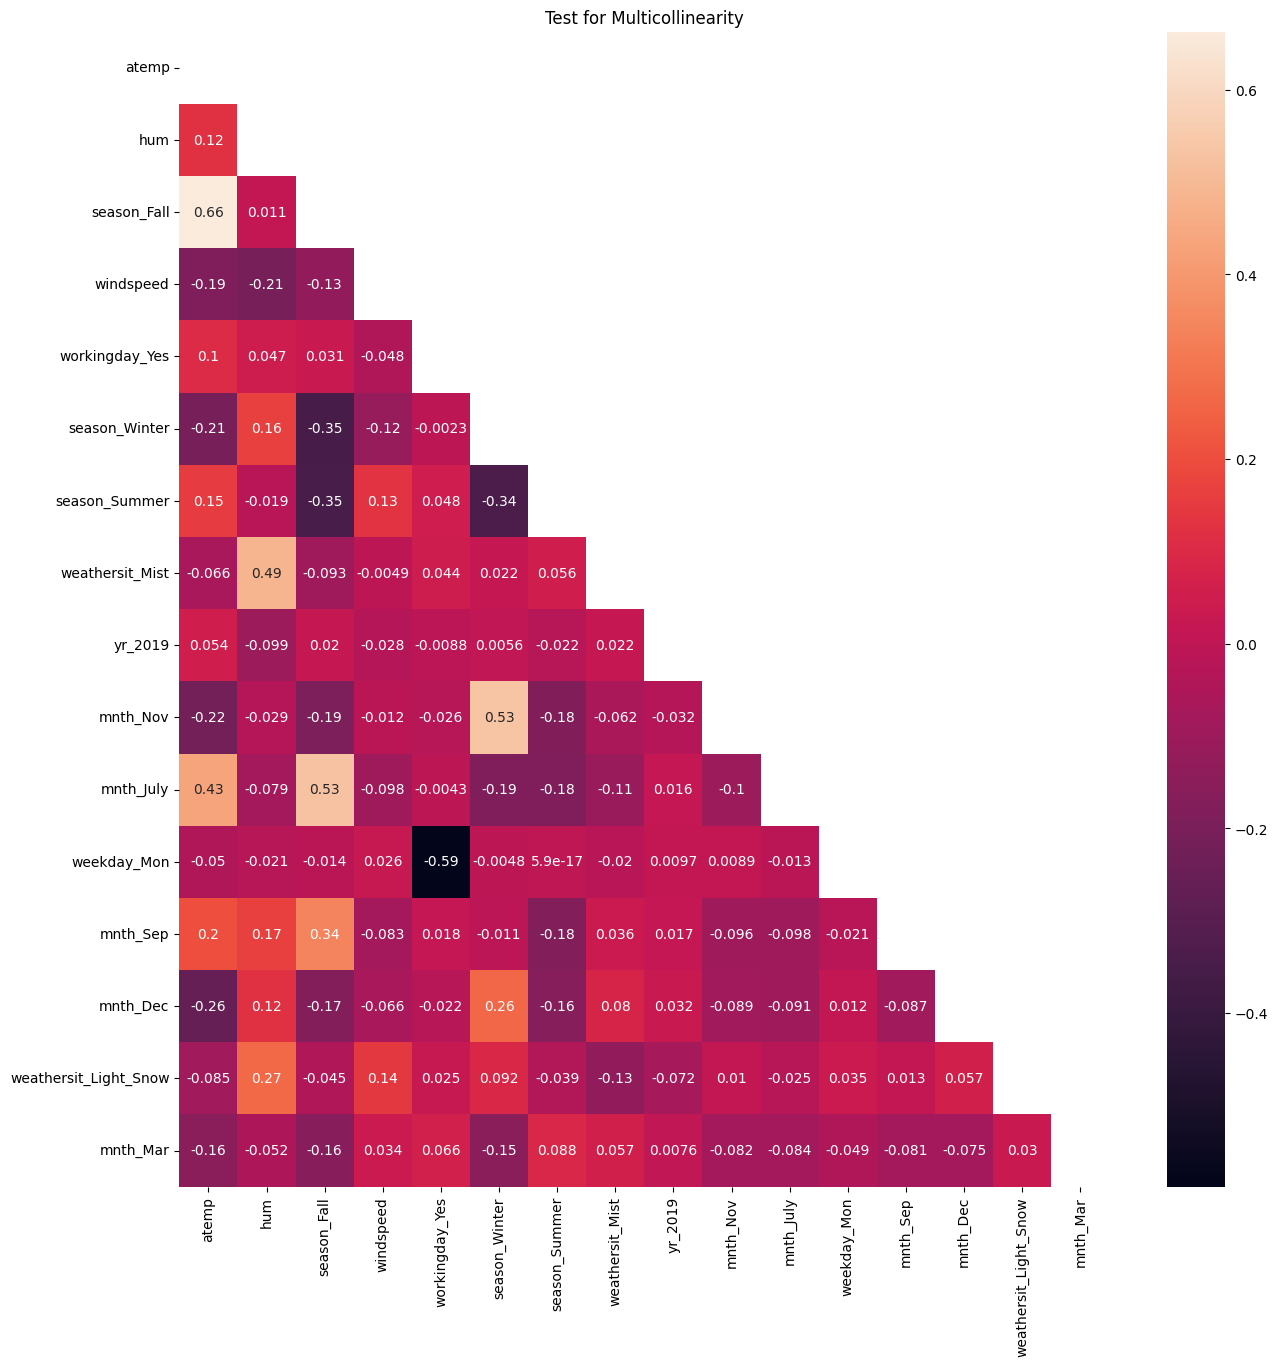

In [120]:
plt.figure(figsize=(15,15))
corr = X_train[cols].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,mask=mask)
plt.title("Test for Multicollinearity");

As it can be seen that none of the selected features have a very high correlation value.

### Predict values for the test dataset:

In [121]:
num_vars = ['atemp','hum','windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])
y_test_pred = lr_final.predict(X_test[cols])

print(f"The R2 Score for test set is: {round(r2_score(y_test,y_test_pred),2)}")

The R2 Score for test set is: 0.85


Inference: <br>
Both the $R^2$ scores of test and train datapoints are matching, thus shows the linear model is a good model.

### Interpretation of the model: <br>

In [122]:
cols = ["atemp","hum","season_Fall","windspeed","workingday_Yes","season_Winter","season_Summer","weathersit_Mist","yr_2019","mnth_Nov","mnth_July","weekday_Mon","mnth_Sep","mnth_Dec","weathersit_Light_Snow","mnth_Mar"]

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.85e-213
Time:                        18:57:33   Log-Likelihood:                -4718.5
No. Observations:                 584   AIC:                             9471.
Df Residuals:                     567   BIC:                             9545.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1617.92

From the above model, we can see that: <br>
- Summer and Fall are the seasons when company should expand.
- High Humidity and high windspeed will decrease the usage.
- Months of July to Nov sees highest usage. This corresponds to the seasons when the bikes are in demand.
- Working days obviously sees high demand of bikes.
- Light weather and Mist sees a good usage of bikes as well due to pleasant weather conditions.

## Conclusion: <br>

Significant variables to predict the demand of the bikes: <br>
1. Working day or not.
2. Temperature
3. Humidity
4. Windspeed
5. Season - Summer, Fall and Winter.
6. Months of high use - July to November
7. Weather situation

*Not in specific order or ranking.